In [3]:
!pip3 install scipy

     |████████████████████████████████| 42.1 MB 210 kB/s eta 0:00:012    |██████████▉                     | 14.2 MB 8.3 MB/s eta 0:00:04
     |████████████████████████████████| 16.8 MB 31.1 MB/s eta 0:00:01    |███▎                            | 1.7 MB 41.7 MB/s eta 0:00:01


In [2]:
import sys
sys.executable

'/usr/bin/python3'

In [6]:
!/usr/bin/python3 -m pip install scipy

  Using cached scipy-1.8.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (42.1 MB)


In [1]:
import cv2
import numpy as np
from scipy import ndimage

## HPF Filters

Examining a region and boosting the intensity of certain pixels depending the intensity of the surrounding pixels

In [26]:
kernel_3x3 = np.array([[-1,-1,-1], [-1,8,-1],[-1,-1,-1]])
img = cv2.imread("./eye.jpg", 0) #image as black and white

In [17]:
kernel_5x5 = np.array([[-1, -1, -1, -1, -1],                        
                       [-1, 1, 2, 1, -1],                        
                       [-1, 2, 4, 2, -1],                        
                       [-1, 1, 2, 1, -1],
                       [-1, -1, -1, -1, -1]])  

Convolving the image 

In [18]:
k3 = ndimage.convolve(img, kernel_3x3)
k5 = ndimage.convolve(img, kernel_5x5)

In [ ]:
cv2.imshow('original',img)
cv2.imshow('k3 convolved',k3)
cv2.imshow('k5 convolved', k5)
cv2.waitKey()
cv2.destroyAllWindows()

To improve edge detection, as edge-finding filters tend to detect noise as edges, we apply blurring to the image first

In [3]:
def strokeEdges(src, dst, blurKsize = 7, edgeKsize=5):
    if blurKsize >=3:
        blurredSrc = cv2.medianBlur(src, blurKsize)
        graySrc = cv2.cvtColor(blurredSrc, cv2.COLOR_BGR2GRAY)
    else:
        graySrc = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) #it doesnt make sense to apply the blur in this case
    cv2.Laplacian(graySrc, cv2.CV_8U, graySrc, ksize= edgeKsize) # laplacian filter to detect edges
    normalizedInverseAlpha = (1.0 / 255)*(255-graySrc) # This will take every value of the gray image, invert the color, and then, convert it into a value between 1 and 0
    channels = cv2.split(src)
    for channel in channels:
        channel[:] = channel * normalizedInverseAlpha # this will decrease intensity of values, because we are multiplying for values in he range [0-1]
    cv2.merge(channels, dst)
    

In [21]:
img  = cv2.imread('./ridge.jpg', 3) #image with color
dest = img.copy()


In [22]:
strokeEdges(img, dest, blurKsize = 1)

In [ ]:
cv2.imshow('original',img)
cv2.imshow('after strokeEdges',dest)
cv2.waitKey()
cv2.destroyAllWindows()

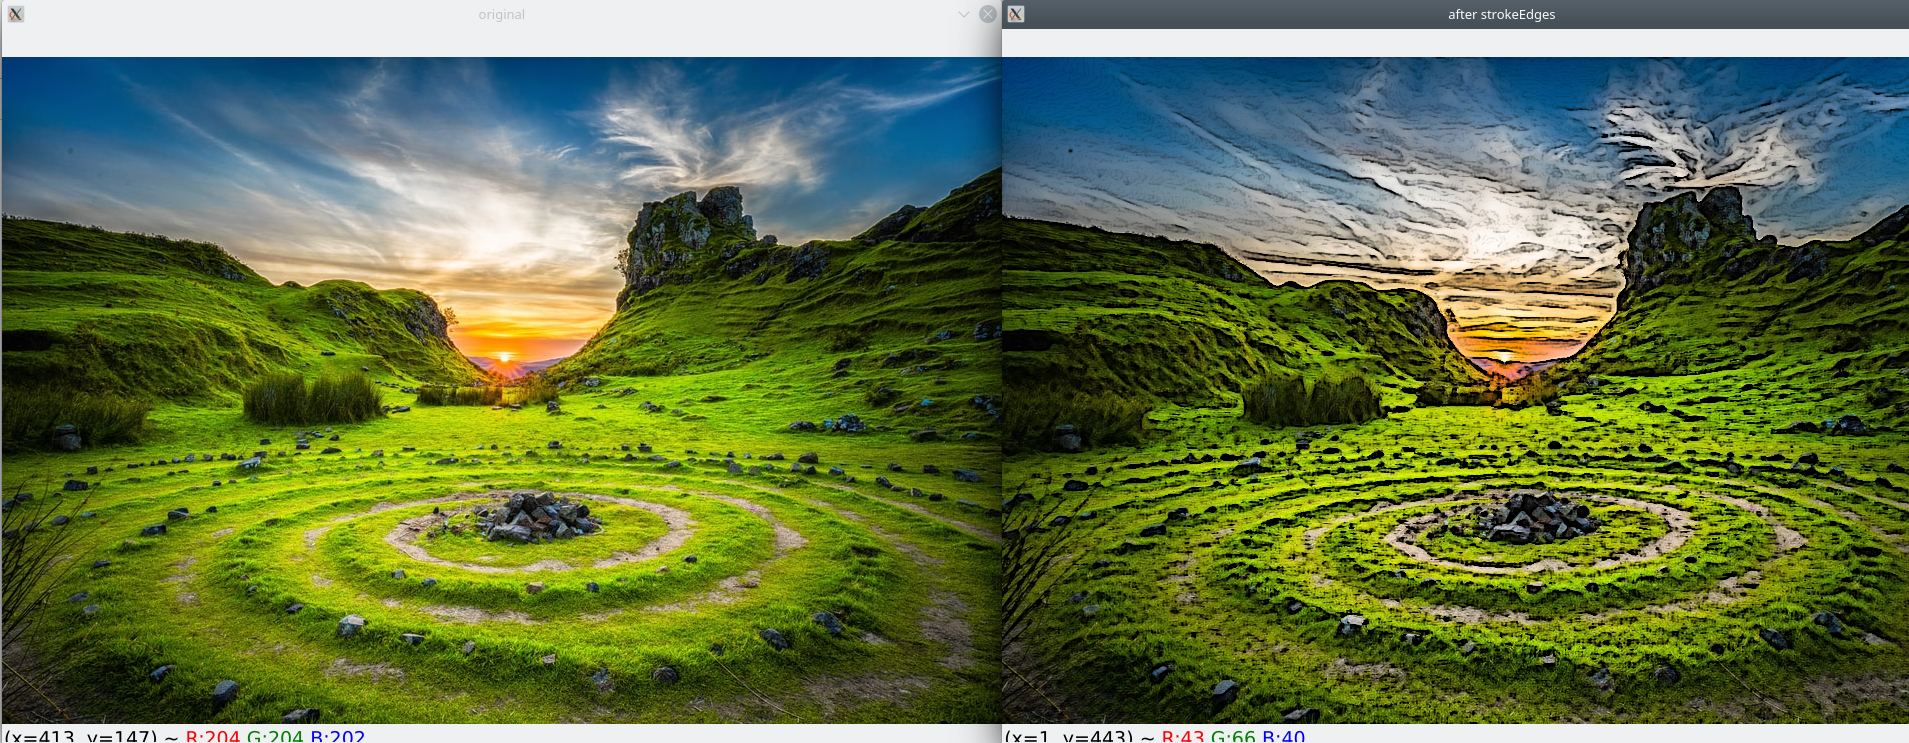

Disabling the blur, we get this:

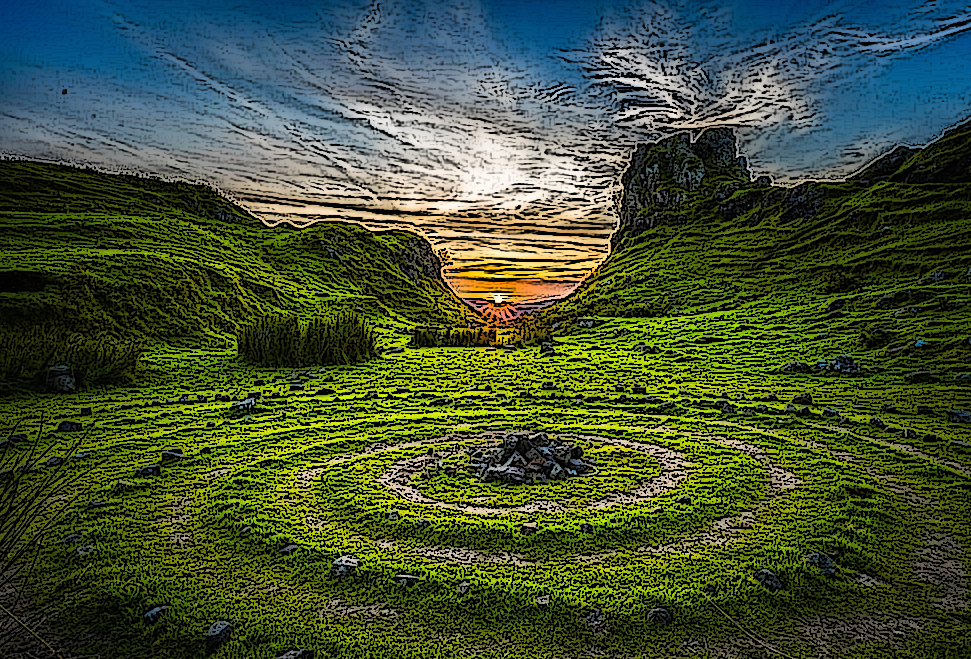